In [1]:
import os
from datetime import datetime
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

In [2]:
latest_date = '20231204'

In [3]:
def get_stock_fundamental(date, ticker):
    # 펀더멘탈 정보 읽어 오기
    df_stock = stock.get_market_fundamental(date, date, ticker)
    # 인덱스 이름 제거
    df_stock.index.name = None
    # 인덱스를 티커로 변경
    df_stock.index = [ticker]
    # 이름 읽어 오기
    name = stock.get_market_ticker_name(ticker)
    # 첫 번째 열에 삽입하기
    df_stock.insert(0, 'Name', name)
    # 주식 데이터 리턴
    return df_stock

In [4]:
# 코스피 상장 주식을 시가총액 순으로 가져 오기
df_kospi = stock.get_market_cap(latest_date, market='KOSPI')

In [5]:
len(df_kospi)

952

In [6]:
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 005930 to 002787
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   종가      952 non-null    int64
 1   시가총액    952 non-null    int64
 2   거래량     952 non-null    int64
 3   거래대금    952 non-null    int64
 4   상장주식수   952 non-null    int64
dtypes: int64(5)
memory usage: 44.6+ KB


In [7]:
csv_file_name = f'kospi_stock_{latest_date}.csv'

In [8]:
#주가 펀더멘탈 정보 가져 오기
df_kospi_target = None
start_time = time.time()
#for idx, ticker in enumerate(df_kospi.head(10).index):
for idx, ticker in enumerate(df_kospi.index):
    #print(f'{idx+1:03d}: {ticker}')
    df_stock_fundamental = get_stock_fundamental(latest_date, ticker)
    #isplay(df_stock_fundamental)
    if not os.path.exists(csv_file_name):
        #df_kospi_target = df_stock_fundamental
        df_stock_fundamental.to_csv(csv_file_name, mode='w', index=False)
    else:
        #df_kospi_target = pd.concat([df_kospi_target, df_stock_fundamental])
        df_stock_fundamental.to_csv(csv_file_name, mode='a', header=False, index=False)
    time.sleep(1)
end_time = time.time()
print('')
print('')
print('*'*50)
print(f'소요 시간: {round(end_time - start_time)} seconds')
print('*'*50)



**************************************************
소요 시간: 1275 seconds
**************************************************


# load kospi data from csv file

In [9]:
df = pd.read_csv(csv_file_name)
df

,Name,BPS,PER,PBR,EPS,DIV,DPS
0,삼성전자,57822.0,9.01,1.26,8057.0,1.99,1444.0
1,LG에너지솔루션,80052.0,130.07,5.37,3306.0,0.00,0.0
2,SK하이닉스,92004.0,40.44,1.42,3242.0,0.92,1200.0
3,삼성바이오로직스,126233.0,62.23,5.64,11442.0,0.00,0.0
4,삼성전자우,0.0,0.00,0.00,0.0,2.46,1445.0
...,...,...,...,...,...,...,...
947,성문전자우,0.0,0.00,0.00,0.0,0.13,10.0
948,진흥기업우B,0.0,0.00,0.00,0.0,0.00,0.0
949,동양우,0.0,0.00,0.00,0.0,1.37,90.0
950,동양2우B,0.0,0.00,0.00,0.0,1.20,150.0


In [10]:
# 지표 중 0 값을 가진 주식 제거
df_div = df[(df==0).sum(1) < 1]
df_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
0,삼성전자,57822.0,9.01,1.26,8057.0,1.99,1444.0
2,SK하이닉스,92004.0,40.44,1.42,3242.0,0.92,1200.0
5,POSCO홀딩스,692323.0,11.46,0.69,41456.0,2.53,12000.0
6,현대차,407147.0,6.37,0.45,28521.0,3.85,7000.0
7,NAVER,151646.0,42.04,1.39,5007.0,0.43,914.0
...,...,...,...,...,...,...,...
890,진도,8369.0,5.80,0.25,367.0,3.29,70.0
893,SHD,42355.0,2.33,0.49,8905.0,0.48,100.0
894,한국ANKOR유전,NaN,NaN,NaN,NaN,NaN,NaN
895,한솔PNS,2311.0,13.32,0.53,92.0,2.04,25.0


In [11]:
# 결측치를 가진 주식 제거
df_div = df_div.dropna()
df_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
0,삼성전자,57822.0,9.01,1.26,8057.0,1.99,1444.0
2,SK하이닉스,92004.0,40.44,1.42,3242.0,0.92,1200.0
5,POSCO홀딩스,692323.0,11.46,0.69,41456.0,2.53,12000.0
6,현대차,407147.0,6.37,0.45,28521.0,3.85,7000.0
7,NAVER,151646.0,42.04,1.39,5007.0,0.43,914.0
...,...,...,...,...,...,...,...
873,성문전자,1756.0,13.58,0.87,112.0,0.33,5.0
876,경인전자,49149.0,10.17,0.43,2080.0,1.65,350.0
890,진도,8369.0,5.80,0.25,367.0,3.29,70.0
893,SHD,42355.0,2.33,0.49,8905.0,0.48,100.0


In [12]:
# 배당률 기준 내림차순 정렬
df_div= df_div.sort_values(by=['DIV'], ascending=False )
df_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
592,영풍제지,3320.0,15.39,0.90,194.0,26.10,779.0
396,일성신약,60174.0,1.52,0.36,14122.0,18.63,4005.0
309,바이오노트,15707.0,1.28,0.27,3277.0,11.67,490.0
184,LX인터내셔널,62867.0,2.07,0.47,14325.0,10.14,3000.0
311,이노션,21241.0,12.10,1.01,1765.0,10.07,2150.0
...,...,...,...,...,...,...,...
30,메리츠금융지주,27050.0,6.66,2.07,8406.0,0.19,105.0
185,후성,3882.0,11.39,3.07,1047.0,0.17,20.0
84,한미약품,70131.0,46.18,4.38,6648.0,0.16,500.0
13,카카오,22893.0,16.36,2.22,3106.0,0.12,60.0


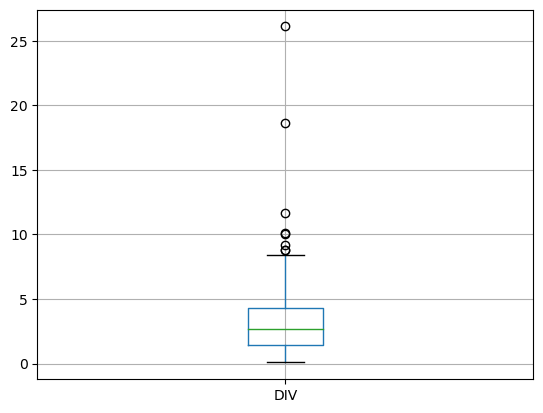

In [13]:
#df_div.boxplot(column=['PER', 'PBR', 'DIV'])
df_div.boxplot(column=['DIV'])
plt.show()

In [14]:
df_div.describe()

,BPS,PER,PBR,EPS,DIV,DPS
count,4.980000e+02,498.000000,498.000000,498.000000,498.000000,498.000000
mean,8.063568e+04,17.059438,0.899378,6846.722892,3.194297,1158.114458
std,2.619887e+05,30.889368,1.184814,22384.792551,2.456879,2129.129953
min,8.080000e+02,0.410000,0.120000,15.000000,0.090000,5.000000
25%,1.085225e+04,4.820000,0.360000,641.500000,1.480000,150.000000
50%,2.544150e+04,9.130000,0.565000,2070.000000,2.690000,495.000000
75%,6.961925e+04,15.525000,1.000000,5994.750000,4.300000,1187.500000
max,4.906107e+06,340.380000,14.920000,406090.000000,26.100000,20000.000000


In [15]:
df_kospi_div_top100 = df_div.head(100)
df_kospi_div_top100

,Name,BPS,PER,PBR,EPS,DIV,DPS
592,영풍제지,3320.0,15.39,0.90,194.0,26.10,779.0
396,일성신약,60174.0,1.52,0.36,14122.0,18.63,4005.0
309,바이오노트,15707.0,1.28,0.27,3277.0,11.67,490.0
184,LX인터내셔널,62867.0,2.07,0.47,14325.0,10.14,3000.0
311,이노션,21241.0,12.10,1.01,1765.0,10.07,2150.0
...,...,...,...,...,...,...,...
745,인터지스,8867.0,2.25,0.28,1092.0,4.89,120.0
269,쿠쿠홀딩스,31140.0,4.40,0.53,3755.0,4.85,800.0
502,무림P&P,10484.0,4.36,0.30,721.0,4.78,150.0
453,삼영무역,26238.0,4.11,0.48,3054.0,4.78,600.0


In [16]:
#kospi_div_top100_{latest_date}.csv
kospi_div_top_100_filename = f'kospi_div_top100_{latest_date}.csv'
df_kospi_div_top100.to_csv(kospi_div_top_100_filename, index=False)

In [17]:
df_kospi_div_top100 = pd.read_csv(kospi_div_top_100_filename)

In [18]:
df_kospi_div_top100 = df_kospi_div_top100.drop(columns=['BPS'])

In [19]:
df_kospi_div_top100 = df_kospi_div_top100.drop(columns=['DPS'])

In [20]:
df_kospi_div_top100.index = df_kospi_div_top100['Name']
df_kospi_div_top100 =  df_kospi_div_top100.drop(columns=['Name'])

In [21]:
df_kospi_div_top100

,PER,PBR,EPS,DIV
Name,,,,
영풍제지,15.39,0.90,194.0,26.10
일성신약,1.52,0.36,14122.0,18.63
바이오노트,1.28,0.27,3277.0,11.67
LX인터내셔널,2.07,0.47,14325.0,10.14
이노션,12.10,1.01,1765.0,10.07
...,...,...,...,...
인터지스,2.25,0.28,1092.0,4.89
쿠쿠홀딩스,4.40,0.53,3755.0,4.85
무림P&P,4.36,0.30,721.0,4.78


# FIN

In [41]:
import dataframe_image as dfi

In [40]:
#%pip install dataframe_image

     ---------------------------------------- 6.7/6.7 MB 9.5 MB/s eta 0:00:00
     -------------------------------------- 398.5/398.5 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 58.5/58.5 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 0.58.0
    Uninstalling websocket-client-0.58.0:
      Successfully uninstalled websocket-client-0.58.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.10 which is incompatible.


In [43]:
#print(tabulate(df_kospi_div_top100.iloc[0:30], headers = 'keys', tablefmt = 'pretty'))
dfi.export(df_kospi_div_top100.iloc[0:30], 'kospi_div_30.png')

In [23]:
df_kospi_div_top100.iloc[30:60]

,PER,PBR,EPS,DIV
Name,,,,
세아특수강,6.48,0.35,2185.0,7.06
케이카,17.12,2.11,631.0,7.04
한일홀딩스,3.93,0.25,2904.0,7.02
휴스틸,0.89,0.31,5675.0,6.90
부국증권,4.59,0.19,4736.0,6.90
유수홀딩스,4.82,0.43,1218.0,6.81
NH투자증권,11.69,0.47,881.0,6.80
CR홀딩스,5.20,0.31,1279.0,6.77
한솔제지,3.37,0.33,3104.0,6.70


In [24]:
df_kospi_div_top100.iloc[60:]

,PER,PBR,EPS,DIV
Name,,,,
롯데정밀화학,10.26,0.65,5738.0,5.94
현대홈쇼핑,5.81,0.26,7541.0,5.93
E1,2.49,0.24,24536.0,5.90
한국주철관,12.16,0.43,559.0,5.88
자이에스앤디,2.09,0.40,2447.0,5.86
KCC글라스,6.99,0.46,5894.0,5.83
KT,6.45,0.52,5209.0,5.83
KPX홀딩스,22.94,0.25,2267.0,5.77
스카이라이프,12.98,0.35,470.0,5.74


In [25]:
# 배당금 상위 100개 기업 통계 
df_kospi_div_top_100.describe()

NameError: name 'df_kospi_div_top_100' is not defined

In [ ]:
df_kospi_div_top_100.boxplot(column=['PER', 'PBR', 'DIV'])

In [ ]:
df_kospi_div_top_100.to_excel('코스피_배당률_Top100-' + latest_date + '.xlsx')

In [ ]:
# 배당금 상위 100개 기업 평균 데이터
df_kospi_div_top_100_mean = df_kospi_div_top_100.mean()
df_kospi_div_top_100_mean

In [ ]:
# 배당금 상위 100개 중 PER, PBR, DIV 기준 평균 초과 기업, 
df_kospi_div_top_100_over_mean = df_kospi_div_top_100[
                     (df_kospi_div_top_100['PER'] < df_kospi_div_top_100_mean['PER']) &
                     (df_kospi_div_top_100['PBR'] < df_kospi_div_top_100_mean['PBR']) &
                     (df_kospi_div_top_100['DIV'] > df_kospi_div_top_100_mean['DIV'])]
df_kospi_div_top_100_over_mean

In [ ]:
df_kospi_div_top_100_over_mean.to_excel('코스피_배당률_Top100_중_평균_초과_기업-' + latest_date + '.xlsx')

In [ ]:
"""
FIN
"""